# Identifying if Companies are Fraudulent Based on Risk Variables



### Introduction

**Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal**
This database aims to assist auditors in identifying fraudulent firms by developing a classification model based on present and historical risk factors. It involves analyzing 777 target firms using the Particle Swarm Optimization (PSO) algorithm to rank risk factors and evaluate their risk audit class. The research also involves understanding the audit risk analysis workflow and proposing a decision-making framework for risk assessment during audit planning. Our research is devoted to using this database to build a model to analyze whether companies are fraudulent or not based on various risk variables through classification.

**Clearly state the question you will try to answer with your project**
Are inherent risk, audit risk and money value good predictors of whether or not the company is fraudulent or not (risk=0/1)

**Identify and describe the dataset that will be used to answer the question**
* Fraudulent (Risk=1)
* Not Fraudulent (Risk=0)
* Money value
* Risk
* Audit risk



### Methods

sdasdasd

### Results

In [84]:
library(tidyverse)
library(dplyr)
library(tidymodels)
library(RColorBrewer)

In [85]:
url <- "https://raw.githubusercontent.com/dvnielma/dsci-100-group76-project/main/audit_risk.csv"
audit <- read.csv(url)
audit

Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,⋯,0.4,0,0.2,0.0,2.4,8.5740,0.4,0.5,1.71480,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,⋯,0.4,0,0.2,0.0,2.0,2.5540,0.4,0.5,0.51080,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,⋯,0.4,0,0.2,0.0,2.0,1.5480,0.4,0.5,0.30960,0
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,⋯,0.4,0,0.2,0.0,4.4,17.5300,0.4,0.5,3.50600,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,⋯,0.4,0,0.2,0.0,2.0,1.4160,0.4,0.5,0.28320,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,⋯,0.4,0,0.2,0.0,2.0,2.1560,0.4,0.5,0.43120,0
3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,⋯,0.4,0,0.2,0.0,3.2,31.7740,0.4,0.5,6.35480,1
3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,⋯,0.4,0,0.2,0.0,4.2,18.0340,0.4,0.5,3.60680,1
3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,⋯,0.4,0,0.2,0.0,4.2,17.2060,0.4,0.5,3.44120,1


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


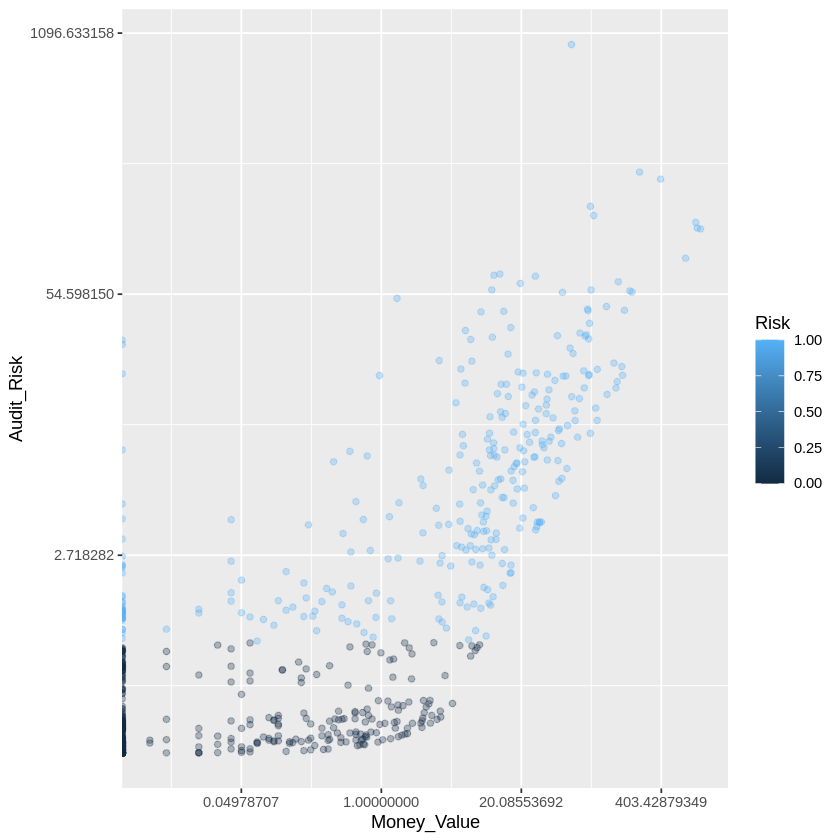

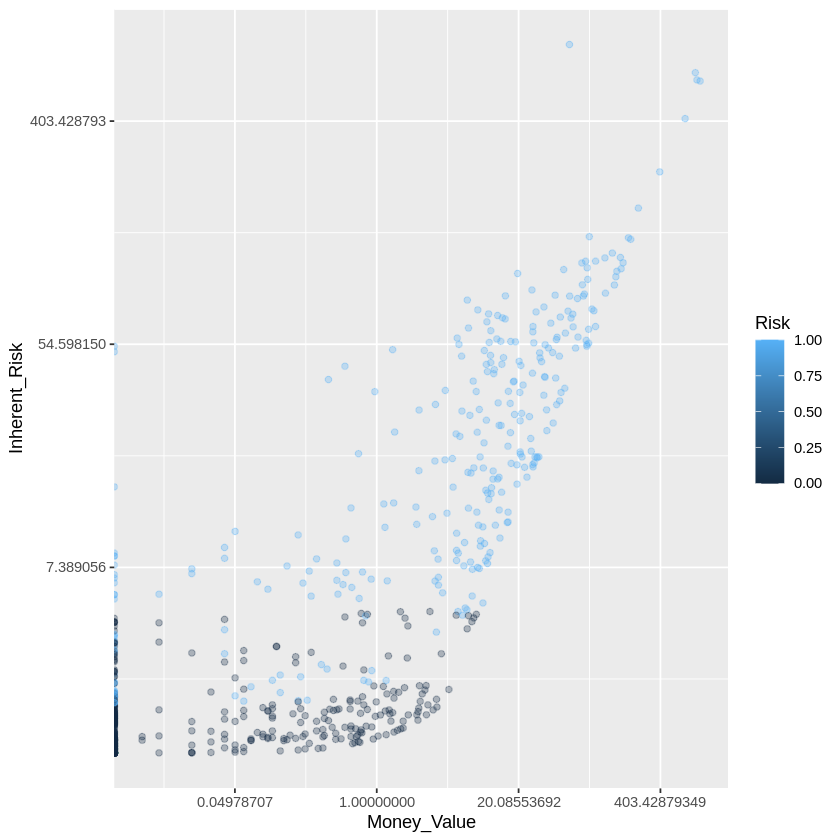

In [86]:
graph <- ggplot(audit, aes(x = Money_Value, y = Audit_Risk, color = Risk)) +
    geom_point(alpha = 0.3) +
    xlim(0, 100) +
    ylim(0,100) +
    scale_x_continuous(trans = "log") + 
    scale_y_continuous(trans = "log")
graph

graph2 <- ggplot(audit, aes(x = Money_Value, y = Inherent_Risk, color = Risk)) +
    geom_point(alpha = 0.3) +
    xlim(0, 100) +
    ylim(0,100) +
    scale_x_continuous(trans = "log") + 
    scale_y_continuous(trans = "log")
graph2

In [87]:
audit <- audit |>
  mutate(Risk = as_factor(Risk))
glimpse(audit)

Rows: 776
Columns: 27
$ Sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ LOCATION_ID    <chr> "23", "6", "6", "6", "6", "6", "7", "8", "8", "8", "8",…
$ PARA_A         <dbl> 4.18, 0.00, 0.51, 0.00, 0.00, 0.00, 1.10, 8.50, 8.40, 3…
$ Score_A        <dbl> 0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.6, 0.6, 0.6, …
$ Risk_A         <dbl> 2.508, 0.000, 0.102, 0.000, 0.000, 0.000, 0.440, 5.100,…
$ PARA_B         <dbl> 2.50, 4.83, 0.23, 10.80, 0.08, 0.83, 7.41, 12.03, 11.05…
$ Score_B        <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.4, 0.6, 0.6, 0.2, 0.6, …
$ Risk_B         <dbl> 0.500, 0.966, 0.046, 6.480, 0.016, 0.166, 2.964, 7.218,…
$ TOTAL          <dbl> 6.68, 4.83, 0.74, 10.80, 0.08, 0.83, 8.51, 20.53, 19.45…
$ numbers        <dbl> 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.5, 5.5, 5.0, 5.0, …
$ Score_B.1      <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, …
$ Risk_C         <dbl> 1.0, 1.0, 1.0, 3.6, 1.0, 1.0, 1.0, 2.2, 2.2, 1.0, 1.0, …
$ Money_Value    <

In [88]:
set.seed(1)
#Train/test split
audit_split <- initial_split(audit, prop = 0.75, strata = Risk)
audit_train <- training(audit_split)
audit_test <- testing(audit_split) 

audit_proportions <- audit_train |>
                      group_by(Risk) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(audit_train))
audit_proportions

Risk,n,percent
<fct>,<int>,<dbl>
0,353,60.75731
1,228,39.24269


In [89]:
#Recipe
audit_recipe <- recipe(Risk ~ Money_Value + Inherent_Risk, data = audit_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

#Training Classifier
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(audit_recipe) |>
  add_model(knn_spec) |>
  fit(data = audit_train)

In [90]:
#Predicting labels in test set
audit_test_predictions <- predict(knn_fit, audit_test) |>
  bind_cols(audit_test)

head(audit_test_predictions)

.pred_class,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,⋯,0.4,0,0.2,0,2.4,4.3720,0.4,0.5,0.87440,0
0,3.89,8,1.09,0.4,0.436,0.35,0.2,0.070,1.44,⋯,0.4,0,0.2,0,2.2,1.9060,0.4,0.5,0.38120,0
0,3.89,8,0.00,0.2,0.000,0.84,0.2,0.168,0.84,⋯,0.4,0,0.2,0,2.0,1.5694,0.4,0.5,0.31388,0
0,3.89,37,1.81,0.4,0.724,1.03,0.2,0.206,2.84,⋯,0.4,0,0.2,0,2.2,2.3300,0.4,0.5,0.46600,0
1,3.89,37,4.86,0.6,2.916,46.78,0.6,28.068,51.64,⋯,0.4,0,0.2,0,4.4,71.4920,0.4,0.5,14.29840,1
0,3.89,3,0.02,0.2,0.004,5.94,0.4,2.376,5.96,⋯,0.4,0,0.2,0,2.6,3.7820,0.4,0.5,0.75640,0


In [91]:
#Computing accuracy
audit_test_predictions |>
  metrics(truth = Risk, estimate = .pred_class) |>
  filter(.metric == "accuracy")
head(audit_test_predictions)

#Confusion matrix accuracy computation
confusion <- audit_test_predictions |>
             conf_mat(truth = Risk, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9282051


.pred_class,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,⋯,0.4,0,0.2,0,2.4,4.3720,0.4,0.5,0.87440,0
0,3.89,8,1.09,0.4,0.436,0.35,0.2,0.070,1.44,⋯,0.4,0,0.2,0,2.2,1.9060,0.4,0.5,0.38120,0
0,3.89,8,0.00,0.2,0.000,0.84,0.2,0.168,0.84,⋯,0.4,0,0.2,0,2.0,1.5694,0.4,0.5,0.31388,0
0,3.89,37,1.81,0.4,0.724,1.03,0.2,0.206,2.84,⋯,0.4,0,0.2,0,2.2,2.3300,0.4,0.5,0.46600,0
1,3.89,37,4.86,0.6,2.916,46.78,0.6,28.068,51.64,⋯,0.4,0,0.2,0,4.4,71.4920,0.4,0.5,14.29840,1
0,3.89,3,0.02,0.2,0.004,5.94,0.4,2.376,5.96,⋯,0.4,0,0.2,0,2.6,3.7820,0.4,0.5,0.75640,0


          Truth
Prediction   0   1
         0 109   5
         1   9  72

In [92]:
audit_split <- initial_split(audit, prop = 0.75, strata = Risk)
audit_subtrain <- training(audit_split)
audit_validation <- testing(audit_split)

audit_recipe <- recipe(Risk ~ Money_Value + Inherent_Risk, data = audit_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_fit <- workflow() |>
  add_recipe(audit_recipe) |>
  add_model(knn_spec) |>
  fit(data = audit_train)

validation_predicted <- predict(knn_fit, audit_validation) |>
  bind_cols(audit_validation)

#Compute the accuracy
acc <- validation_predicted |>
  metrics(truth = Risk, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()
acc

[1] 0.9641026

In [93]:
#Cross Validation
audit_vfold <- vfold_cv(audit_train, v = 5, strata = Risk)

vfold_metrics <- workflow() |>
                  add_recipe(audit_recipe) |>
                  add_model(knn_spec) |>
                  fit_resamples(resamples = audit_vfold) |>
                  collect_metrics()
vfold_metrics

x Fold3: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ! Problem while computing `.row = orig_rows`.
  ✖ `.row` must be size 116 or 1, not 117.



.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.9569677,4,0.006889382,Preprocessor1_Model1
roc_auc,binary,0.9761942,4,0.011251197,Preprocessor1_Model1


In [94]:
#Parameter selection
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 4))
knn_results <- workflow() |>
  add_recipe(audit_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = audit_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies


x Fold3: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ! Problem while computing `.row = orig_rows`.
  ✖ `.row` must be size 116 or 1, not 117.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9460981,4,0.005535634,Preprocessor1_Model01
5,accuracy,binary,0.9504831,4,0.007221616,Preprocessor1_Model02
9,accuracy,binary,0.9504088,4,0.009535249,Preprocessor1_Model03
13,accuracy,binary,0.9525827,4,0.007470297,Preprocessor1_Model04
17,accuracy,binary,0.9504459,4,0.008834682,Preprocessor1_Model05
21,accuracy,binary,0.9482349,4,0.007955588,Preprocessor1_Model06
25,accuracy,binary,0.9589558,4,0.009015912,Preprocessor1_Model07
29,accuracy,binary,0.9546823,4,0.007460949,Preprocessor1_Model08
33,accuracy,binary,0.9503716,4,0.005582584,Preprocessor1_Model09


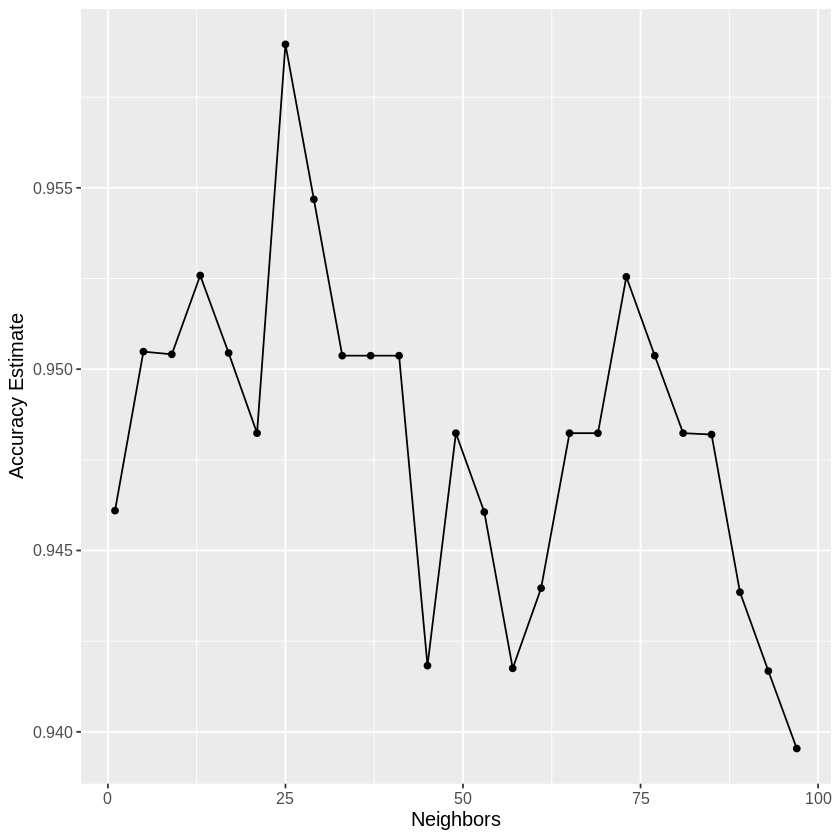

In [95]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

In [97]:
#Model recipe
audit_recipe <- recipe(Risk ~ Money_Value + Inherent_Risk, data = audit_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

#Retrain classifier
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 25) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(audit_recipe) |>
  add_model(knn_spec) |>
  fit(data = audit_train)

#Predicting labels in test set
audit_test_predictions <- predict(knn_fit, audit_test) |>
  bind_cols(audit_test)

head(audit_test_predictions)

.pred_class,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,⋯,0.4,0,0.2,0,2.4,4.3720,0.4,0.5,0.87440,0
0,3.89,8,1.09,0.4,0.436,0.35,0.2,0.070,1.44,⋯,0.4,0,0.2,0,2.2,1.9060,0.4,0.5,0.38120,0
0,3.89,8,0.00,0.2,0.000,0.84,0.2,0.168,0.84,⋯,0.4,0,0.2,0,2.0,1.5694,0.4,0.5,0.31388,0
1,3.89,37,1.81,0.4,0.724,1.03,0.2,0.206,2.84,⋯,0.4,0,0.2,0,2.2,2.3300,0.4,0.5,0.46600,0
1,3.89,37,4.86,0.6,2.916,46.78,0.6,28.068,51.64,⋯,0.4,0,0.2,0,4.4,71.4920,0.4,0.5,14.29840,1
0,3.89,3,0.02,0.2,0.004,5.94,0.4,2.376,5.96,⋯,0.4,0,0.2,0,2.6,3.7820,0.4,0.5,0.75640,0


In [98]:
#Model accuracy
audit_test_predictions |>
  metrics(truth = Risk, estimate = .pred_class) |>
  filter(.metric == "accuracy")
head(audit_test_predictions)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9333333


.pred_class,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,⋯,0.4,0,0.2,0,2.4,4.3720,0.4,0.5,0.87440,0
0,3.89,8,1.09,0.4,0.436,0.35,0.2,0.070,1.44,⋯,0.4,0,0.2,0,2.2,1.9060,0.4,0.5,0.38120,0
0,3.89,8,0.00,0.2,0.000,0.84,0.2,0.168,0.84,⋯,0.4,0,0.2,0,2.0,1.5694,0.4,0.5,0.31388,0
1,3.89,37,1.81,0.4,0.724,1.03,0.2,0.206,2.84,⋯,0.4,0,0.2,0,2.2,2.3300,0.4,0.5,0.46600,0
1,3.89,37,4.86,0.6,2.916,46.78,0.6,28.068,51.64,⋯,0.4,0,0.2,0,4.4,71.4920,0.4,0.5,14.29840,1
0,3.89,3,0.02,0.2,0.004,5.94,0.4,2.376,5.96,⋯,0.4,0,0.2,0,2.6,3.7820,0.4,0.5,0.75640,0


### Discussion

Based on our analysis, we found that using money value and inherent risk provided high accuracy in the classification model. When first creating the model, we had to decide between using audit risk and inherent risk when training the recipe, so we plotted "Audit_Risk and Money_Value" and "Inherent_Risk vs Money_Value" in two different scatterplots so we can identify trends in both variables. At first glance, with a positive exponential correlation between "Audit_Risk and Money_Value" and "Inherent_Risk vs Money_Value". At a closer look, companies with higher inherent risk and audit risk scores are more likely to be fraudulent, with there being an overlap between fraudulent and non-fraudulent companies in the "Inherent_Risk vs Money_Value" scatterplot. 

By comparing the trends between both scatterplots, we decided to use inherent risk and money value to train the model due to the high amount of overlap between fraudulent and non-fraudulent observations in the scatterplot. If we were to recreate this model using audit risk and money value, it might result in a lower accuracy since the model was not trained with data where fraudulent and non-fraudulent companies overlap on the scatterplot.

After evaluating the recipe using 5 folds, a model accuracy of 93.33% with 25 neighbours was found to be the best parameter value for the KNN model. This is what we expected to find since by splitting the original audit dataset into training and testing subsets, a fairly accurate model should have been created.

Building this classification model can have a positive contribution to the work of auditors as it can aid them in predicting whether or not based on present or historical inherent risk. Although it will not replace the work that they do when evaluating companies, it can have a significant impact in aiding the auditor's decision. This model can be improved by taking more types of risk and other factors into account when creating and training the model. In this model, we only used the company's inherent risk score and money value to train the model, however, we could have also used additional values such as sector score, para score and total discrepancy values from the audit dataset. Using more variables can possibly increase the accuracy of the model because of the higher number of things that the model can use to make its prediction, however, this creates a number of questions regarding the variables that can be used. How can we identify which variables included in the dataset are valuable and can help improve the model’s accuracy? Are there other trends in between other variables that we did not know?  Are there other variables not included in the dataset that can be used to build a classification model? 


### References

* reference 1 
* reference 2